In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

# Load the data

In [93]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [3]:
y.shape, tx.shape

((10000,), (10000, 2))

### NB: throughout this laboratory the data has the following format: 
  * there are **N = 10000** data entries
  * **y** represents the column vector containing weight information -- that which we wish to predict/the output (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,)**.
  * **tx** represents the matrix $\tilde{X}$ formed by laterally concatenating a column vector of 1s to the column vector of height information -- the input data (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,2)**.

# 1. Computing the Cost Function
Fill in the `compute_loss` function below:

In [39]:
def compute_loss(y, tx, w):
    """Calculate the loss using either MSE or MAE.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w.
    """
    e=y-np.dot(tx,w)
    return 1/len(y)*np.dot(e,e.T)

# 2. Grid Search

Fill in the function `grid_search()` below:

In [40]:
# from costs import *


def grid_search(y, tx, grid_w0, grid_w1):
    """Algorithm for grid search.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        grid_w0: numpy array of shape=(num_grid_pts_w0, ). A 1D array containing num_grid_pts_w0 values of parameter w0 to be tested in the grid search.
        grid_w1: numpy array of shape=(num_grid_pts_w1, ). A 1D array containing num_grid_pts_w1 values of parameter w1 to be tested in the grid search.

    Returns:
        losses: numpy array of shape=(num_grid_pts_w0, num_grid_pts_w1). A 2D array containing the loss value for each combination of w0 and w1
    """

    losses = np.zeros((len(grid_w0), len(grid_w1)))
    
    for i in range(len(grid_w0)):
        for j in range(len(grid_w1)):
            losses[i,j]=compute_loss(y,tx,np.array([grid_w0[i],grid_w1[j]]))

    return losses

Let us play with the grid search demo now!

Grid Search: loss*=31.2201713049776, w0*=73.36683417085428, w1*=12.8140703517588, execution time=3.451 seconds


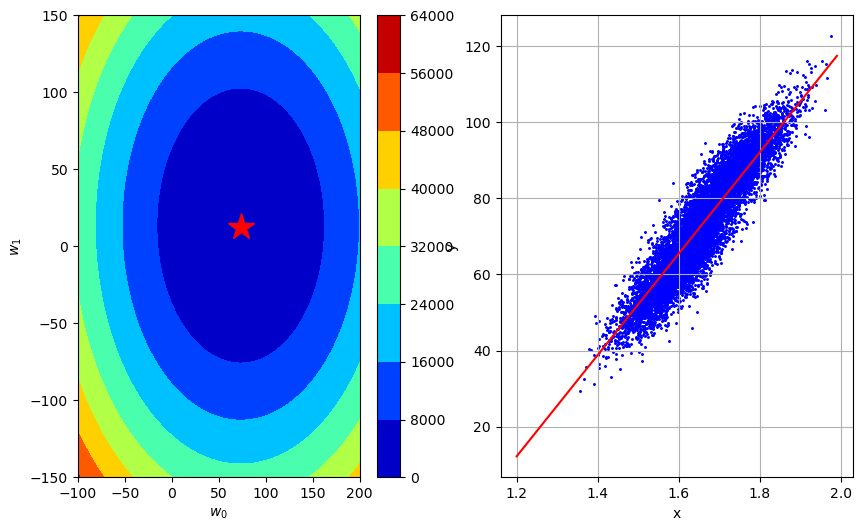

In [41]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=200)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print(
    "Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
        l=loss_star, w0=w0_star, w1=w1_star, t=execution_time
    )
)

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0, 6.0)
fig.savefig("grid_plot")  # Optional saving

# 3. Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [42]:
def compute_gradient(y, tx, w):
    """Computes the gradient at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        An numpy array of shape (2, ) (same shape as w), containing the gradient of the loss at w.
    """
    e=y-np.dot(tx,w)
    gd=(-1/len(y))*np.dot(tx.T,e)
    return(gd)

In [43]:
compute_gradient(np.array([2,4]),np.array(([1,1],[1,2])),np.array([1,2]))

array([1. , 1.5])

In [44]:
print(compute_gradient(y,tx,np.array([100,20])))
print(compute_gradient(y,tx,np.array([50,10])))

[26.706078    6.52028757]
[-23.293922    -3.47971243]


Please fill in the functions `gradient_descent` below:

In [45]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """The Gradient Descent (GD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of GD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of GD
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        loss=compute_loss(y,tx,w)
        losses.append(loss)
        print(
            "GD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
        gd=compute_gradient(y,tx,w)
        #update w by gradient
        w=w-gamma*gd
        ws.append(w)
        

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [ ]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([-1000, 1000])

# Start gradient descent.
start_time = datetime.datetime.now()
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

In [31]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4. Stochastic gradient descent

In [47]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient at w from a data sample batch of size B, where B < N, and their corresponding labels.

    Args:
        y: numpy array of shape=(B, )
        tx: numpy array of shape=(B,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the stochastic gradient of the loss at w.
    """

    e=y-np.dot(tx,w)
    gd=(-1/len(y))*np.dot(tx.T,e)
    return(gd)


def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic Gradient Descent algorithm (SGD).

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic gradient
        max_iters: a scalar denoting the total number of iterations of SGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters):
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size):
            loss=compute_loss(minibatch_y,minibatch_tx,w)
            gd=compute_gradient(minibatch_y,minibatch_tx,w)
        losses.append(loss)
        print(
            "SGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
        w=w-gamma*gd
        ws.append(w)
    return losses, ws

In [37]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD iter. 0/49: loss=3000.8452235916584, w0=0, w1=0
SGD iter. 1/49: loss=2338.401818594987, w0=5.477997100758323, w1=-7.674713714738626
SGD iter. 2/49: loss=9545.042061292399, w0=10.313699550863156, w1=-9.921230814368672
SGD iter. 3/49: loss=2608.681855467077, w0=20.083572662266597, w1=2.9036518169067946
SGD iter. 4/49: loss=2187.540552008342, w0=25.191098340583913, w1=2.2472407719292633
SGD iter. 5/49: loss=1585.7215973761963, w0=29.868213425770872, w1=2.1339983860867187
SGD iter. 6/49: loss=779.1081980351847, w0=33.85032542491931, w1=1.1081534866567027
SGD iter. 7/49: loss=1438.6706163480253, w0=36.64157639542552, w1=-1.2909554805900716
SGD iter. 8/49: loss=1238.1488292905528, w0=40.43455756641494, w1=-1.0308409977784745
SGD iter. 9/49: loss=3035.3754804766977, w0=43.95329147123149, w1=-2.1655413461748134
SGD iter. 10/49: loss=208.04730660724508, w0=49.46271565210257, w1=5.556475321022521
SGD iter. 11/49: loss=7.8292588498167, w0=50.905100159116024, w1=4.699932478723855
SGD iter. 12/

In [48]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses,
        sgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5. Effect of Outliers and MAE Cost Function

In [64]:
height, weight, gender = load_data(sub_sample=True, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [65]:
y.shape, tx.shape

((200,), (200, 2))

In [66]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()

gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)

end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=5658.544448876833, w0=0, w1=0
GD iter. 1/49: loss=534.1000517558858, w0=51.54259072181176, w1=10.132993413506084
GD iter. 2/49: loss=72.9000560150009, w0=67.0053679383553, w1=13.172891437557825
GD iter. 3/49: loss=31.39205639832127, w0=71.64420110331838, w1=14.084860844773324
GD iter. 4/49: loss=27.656336432820154, w0=73.03585105280729, w1=14.358451666937965
GD iter. 5/49: loss=27.320121635925045, w0=73.45334603765397, w1=14.440528913587356
GD iter. 6/49: loss=27.28986230420449, w0=73.57859453310797, w1=14.46515208758217
GD iter. 7/49: loss=27.287138964349634, w0=73.61616908174418, w1=14.472539039780616
GD iter. 8/49: loss=27.286893863762707, w0=73.62744144633503, w1=14.474755125440149
GD iter. 9/49: loss=27.286871804709882, w0=73.63082315571229, w1=14.47541995113801
GD iter. 10/49: loss=27.286869819395115, w0=73.63183766852546, w1=14.475619398847368
GD iter. 11/49: loss=27.286869640716795, w0=73.63214202236942, w1=14.475679233160175
GD iter. 12/49: loss=27.28686962

In [67]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 6. Subgradient descent

In [81]:
def compute_loss(y, tx, w):
    """Calculate the loss using either MSE or MAE.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w.
    """
    e=y-np.dot(tx,w)
    return 1/len(y)*np.sum(np.absolute(e))

In [89]:
def compute_subgradient_mae(y, tx, w):
    """Compute a subgradient of the MAE at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the subgradient of the MAE at w.
    """
    e=y-np.dot(tx,w)
    e=np.sign(e) #we take only the signs according to the first terms of the chain rule which is a subgradient of the absolute function
    return((-1/len(y))*np.dot(tx.T,e))

In [90]:
def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """The SubGradient Descent (SubGD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubGD
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        loss=compute_loss(y,tx,w)
        losses.append(loss)
        print(
            "GD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
        gd=compute_subgradient_mae(y,tx,w)
        #update w by gradient
        w=w-gamma*gd
        ws.append(w)
        

    return losses, ws

In [94]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subgd_losses, subgd_ws = subgradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubGD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/499: loss=73.29392200210518, w0=0, w1=0
GD iter. 1/499: loss=72.59392200210517, w0=0.7, w1=-1.5529755259535704e-15
GD iter. 2/499: loss=71.89392200210517, w0=1.4, w1=-3.1059510519071408e-15
GD iter. 3/499: loss=71.19392200210518, w0=2.0999999999999996, w1=-4.658926577860711e-15
GD iter. 4/499: loss=70.49392200210518, w0=2.8, w1=-6.2119021038142816e-15
GD iter. 5/499: loss=69.79392200210518, w0=3.5, w1=-7.764877629767851e-15
GD iter. 6/499: loss=69.09392200210519, w0=4.2, w1=-9.317853155721422e-15
GD iter. 7/499: loss=68.39392200210517, w0=4.9, w1=-1.0870828681674993e-14
GD iter. 8/499: loss=67.69392200210518, w0=5.6000000000000005, w1=-1.2423804207628563e-14
GD iter. 9/499: loss=66.99392200210518, w0=6.300000000000001, w1=-1.3976779733582134e-14
GD iter. 10/499: loss=66.29392200210518, w0=7.000000000000001, w1=-1.5529755259535703e-14
GD iter. 11/499: loss=65.59392200210519, w0=7.700000000000001, w1=-1.7082730785489272e-14
GD iter. 12/499: loss=64.89392200210517, w0=8.4, w1=-

In [95]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subgd_losses,
        subgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

# Stochastic Subgradient Descent

**NB** for the computation of the subgradient you can reuse the `compute_subgradient` method that you implemented above, just making sure that you pass in a minibatch as opposed to the full data.

In [86]:
def stochastic_subgradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """Compute a stochastic subgradient at w from a data sample batch of size B, where B < N, and their corresponding labels.

    Args:
        y: numpy array of shape=(B, )
        tx: numpy array of shape=(B,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic subgradient
        max_iters: a scalar denoting the total number of iterations of SubSGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubSGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubSGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters):
            for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size):
                loss=compute_loss(minibatch_y,minibatch_tx,w)
                gd=compute_subgradient_mae(minibatch_y,minibatch_tx,w)
            losses.append(loss)
            print(
                "SGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                    bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
                )
            )
            w=w-gamma*gd
            ws.append(w)
    return losses, ws

In [87]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subsgd_losses, subsgd_ws = stochastic_subgradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubSGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD iter. 0/499: loss=61.28895141087782, w0=0, w1=0
SGD iter. 1/499: loss=70.28752909193376, w0=0.7, w1=-0.347288636555193
SGD iter. 2/499: loss=53.64143079199593, w0=1.4, w1=-0.18361915924681055
SGD iter. 3/499: loss=56.55645082665011, w0=2.0999999999999996, w1=-0.7814017993042837
SGD iter. 4/499: loss=96.5900211405818, w0=2.8, w1=-1.284662505209746
SGD iter. 5/499: loss=54.00055374995808, w0=3.5, w1=0.018285368696189908
SGD iter. 6/499: loss=53.12535309819874, w0=4.2, w1=-0.331915225580205
SGD iter. 7/499: loss=77.52121691356368, w0=4.9, w1=-0.6821158198565999
SGD iter. 8/499: loss=44.433488915713255, w0=5.6000000000000005, w1=0.012389853041409715
SGD iter. 9/499: loss=54.79830705115625, w0=6.300000000000001, w1=-1.3646586327111023
SGD iter. 10/499: loss=46.59572296218447, w0=7.000000000000001, w1=-1.8765346322868486
SGD iter. 11/499: loss=57.64311065945773, w0=7.700000000000001, w1=-2.474317272344322
SGD iter. 12/499: loss=70.1067613015934, w0=8.4, w1=-2.899838198631057
SGD iter. 13

In [88]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subsgd_losses,
        subsgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subsgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>